### Task 2 - Prediction using Unsupervised ML

### By : Siddesh Pardeshi 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset :

In [2]:
iris_df = pd.read_csv('Iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dropping the id column
iris_df.drop('Id', axis = 1, inplace = True)

# Data Information :

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Description :

In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis :

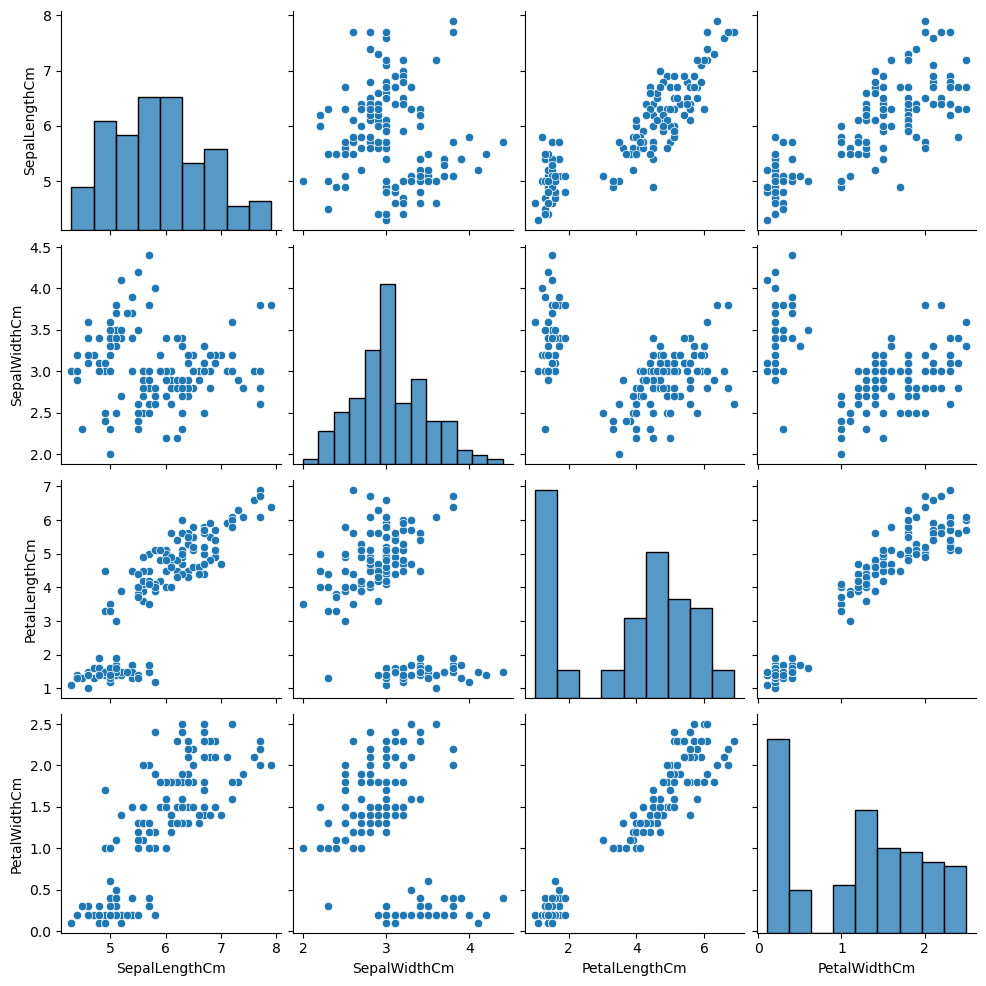

In [7]:
sns.pairplot(iris_df)

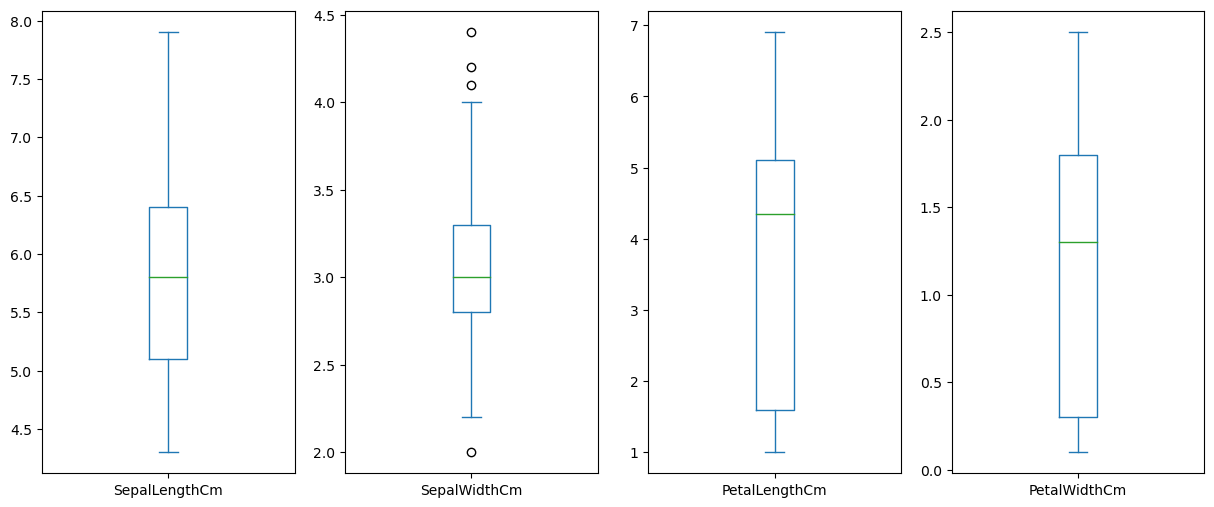

In [8]:
iris_df.plot.box(subplots = True, sharex = False, sharey = False, figsize = (15, 6))
plt.show()

In [9]:
num_val = iris_df.corr()
num_val

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


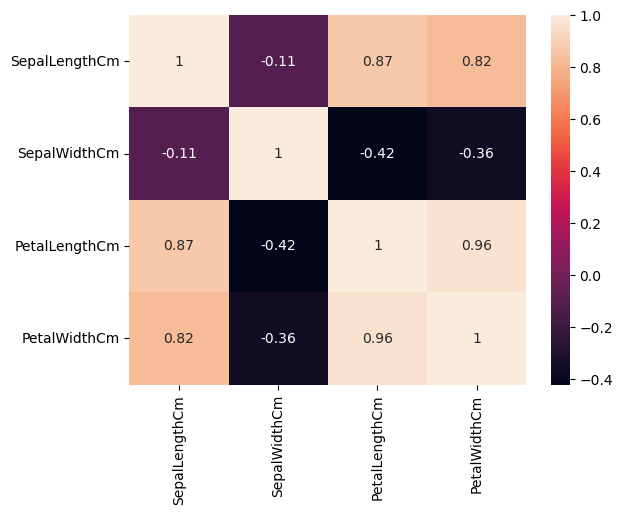

In [10]:
sns.heatmap(num_val, annot = True)
plt.show()

In [11]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

# Model Development & Evaluation :

### Elbow Analysis: Finding Optimal K

In [13]:
from sklearn.cluster import KMeans

In [14]:
inertia_values = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

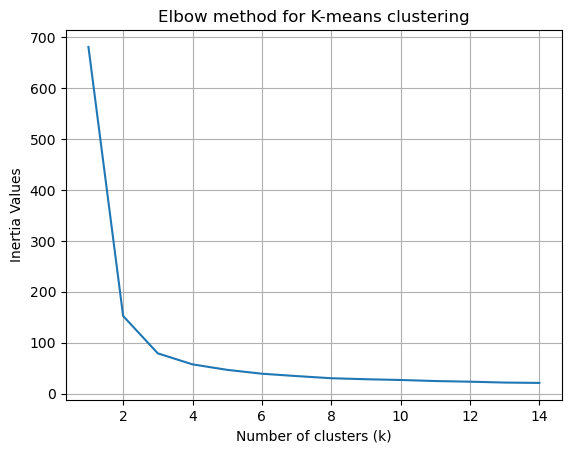

In [15]:
plt.plot(k_range, inertia_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia Values')
plt.title('Elbow method for K-means clustering')
plt.grid(True)
plt.show()

### Final Model :

In [16]:
k_means = KMeans(n_clusters = 3, max_iter = 300, random_state = 0, init = 'k-means++')
k_means.fit(x)
pred_y = k_means.predict(x)

In [17]:
print(pred_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [18]:
print(k_means.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


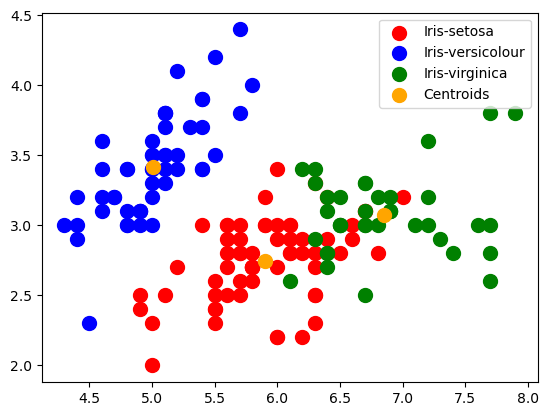

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(x[pred_y == 0, 0], x[pred_y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_y == 1, 0], x[pred_y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_y == 2, 0], x[pred_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()
plt.show()